   ### Problem
    In this assignment students have to transform iris data into 3 dimensions
    and plot a 3d chart with transformed dimensions and colour each data
    point with specific class.
 ### Hint:
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    from sklearn import decomposition
    from sklearn import datasets


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
import seaborn as sb
import pandas as pd

In [2]:
iris=datasets.load_iris()
[i for i in iris]

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [6]:
pca=decomposition.PCA(n_components=3)
pc_array=pca.fit_transform(df)

In [7]:
iris_pc=pd.DataFrame(pc_array)

In [8]:
iris_class=pd.DataFrame(iris.target,columns=['Class'])

In [9]:
final_df=pd.concat([iris_pc.rename(columns={0:'PC_1',1:'PC_2',2:'PC_3'}),iris_class],axis=1)
final_df

,PC_1,PC_2,PC_3,Class
0,-2.684126,0.319397,-0.027915,0
1,-2.714142,-0.177001,-0.210464,0
2,-2.888991,-0.144949,0.017900,0
3,-2.745343,-0.318299,0.031559,0
4,-2.728717,0.326755,0.090079,0
...,...,...,...,...
145,1.944110,0.187532,0.177825,2
146,1.527167,-0.375317,-0.121898,2
147,1.764346,0.078859,0.130482,2
148,1.900942,0.116628,0.723252,2


In [10]:
x=final_df[final_df['Class']==0].drop('Class',axis=1).to_numpy()
y=final_df[final_df['Class']==1].drop('Class',axis=1).to_numpy()
z=final_df[final_df['Class']==2].drop('Class',axis=1).to_numpy()

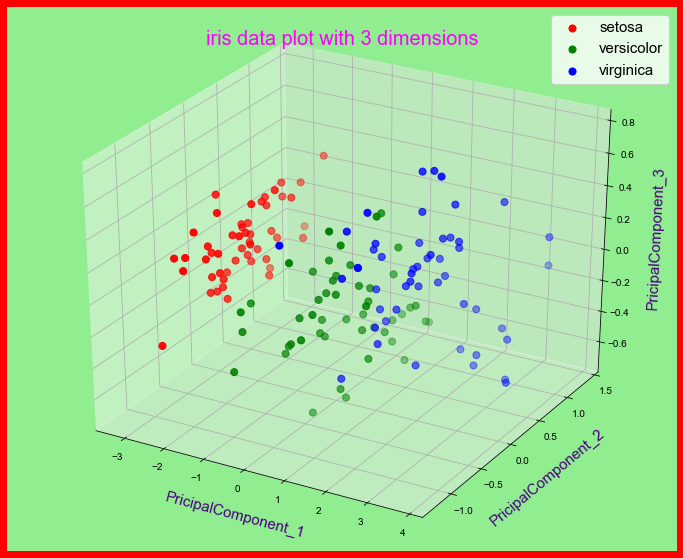

In [11]:
fig=plt.figure(figsize=(12,10))
ax=plt.axes(projection='3d')
ax.set_xlabel('PricipalComponent_1',fontsize=15,color='indigo')
ax.set_ylabel('PricipalComponent_2',fontsize=15,color='indigo')
ax.set_zlabel('PricipalComponent_3',fontsize=15,color='indigo')
ax.set_title('iris data plot with 3 dimensions',fontsize=20,color='magenta')
ax.scatter(x[:,0],x[:,1],x[:,2],c='red',s=50)
ax.scatter(y[:,0],y[:,1],y[:,2],c='green',s=50)
ax.scatter(z[:,0],z[:,1],z[:,2],c='blue',s=50)
ax.set(facecolor='lightgreen')
fig.set(facecolor='red')
plt.legend(['setosa','versicolor', 'virginica'],fontsize=15)
sb.set_style('white')
ax.xaxis.labelpad = 12
ax.yaxis.labelpad = 12
ax.zaxis.labelpad = 12
ax.title.labelpad = 20
plt.show()